In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import joblib
import seaborn as sns
import nltk

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Dataset Information:

In [8]:
df = pd.read_csv('C:/Users/Administrator/Desktop/DS Projects/DS Projects DataFiles/P7/ResumeDataSet.csv')

df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
print("Categories:")
print(df['Category'].unique())

Categories:
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


## Text Processing:

In [10]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Cleans and preprocesses the input text."""
    # 1. Lowercase the text
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+\s*', ' ', text)
    
    # 3. Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # 4. Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 5. Tokenization
    tokens = word_tokenize(text)
    
    # 6. Remove stopwords and apply lemmatization
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2
    ]
    
    return ' '.join(cleaned_tokens)

df = pd.read_csv('C:/Users/Administrator/Desktop/DS Projects/DS Projects DataFiles/P7/ResumeDataSet.csv')

# Apply the preprocessing function to the 'Resume' column
print("Preprocessing text...")
df['cleaned_resume'] = df['Resume'].apply(preprocess_text)

# Display the original and cleaned text of the first resume
print("\nOriginal Resume")
print(df['Resume'][0])
print("\nCleaned Resume")
print(df['cleaned_resume'][0])

# Save the preprocessed data for the next phase
df.to_csv('preprocessed_resumes.csv', index=False)
print("\nPreprocessed data saved to preprocessed_resumes.csv")

Preprocessing text...

Original Resume
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Inve

## Feature Engineering & Model Training:


In [11]:
# 1. Label Encoding
# Convert categorical labels (e.g., 'Data Scientist') into numerical labels
label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# 2. Feature Engineering (TF-IDF) & Data Splitting
X = df['cleaned_resume']
y = df['Category_encoded']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and fit the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 3. Define, Train, and Compare Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

best_model = None
best_accuracy = 0.0
model_accuracies = {}

for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"Accuracy: {accuracy * 100:.2f}%\n")
    
    # Check if this is the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"Best performing model is: {best_model_name} with {best_accuracy * 100:.2f}% accuracy.")


# 4. Save the BEST Model and Supporting Files
joblib.dump(best_model, 'best_resume_classifier.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

Training Naive Bayes
Accuracy: 93.26%

Training Logistic Regression
Accuracy: 99.48%

Training Random Forest
Accuracy: 99.48%

Best performing model is: Logistic Regression with 99.48% accuracy.


['label_encoder.joblib']

## Model Evaluation:

Evaluating model: LogisticRegression

Model Accuracy: 99.48%

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1

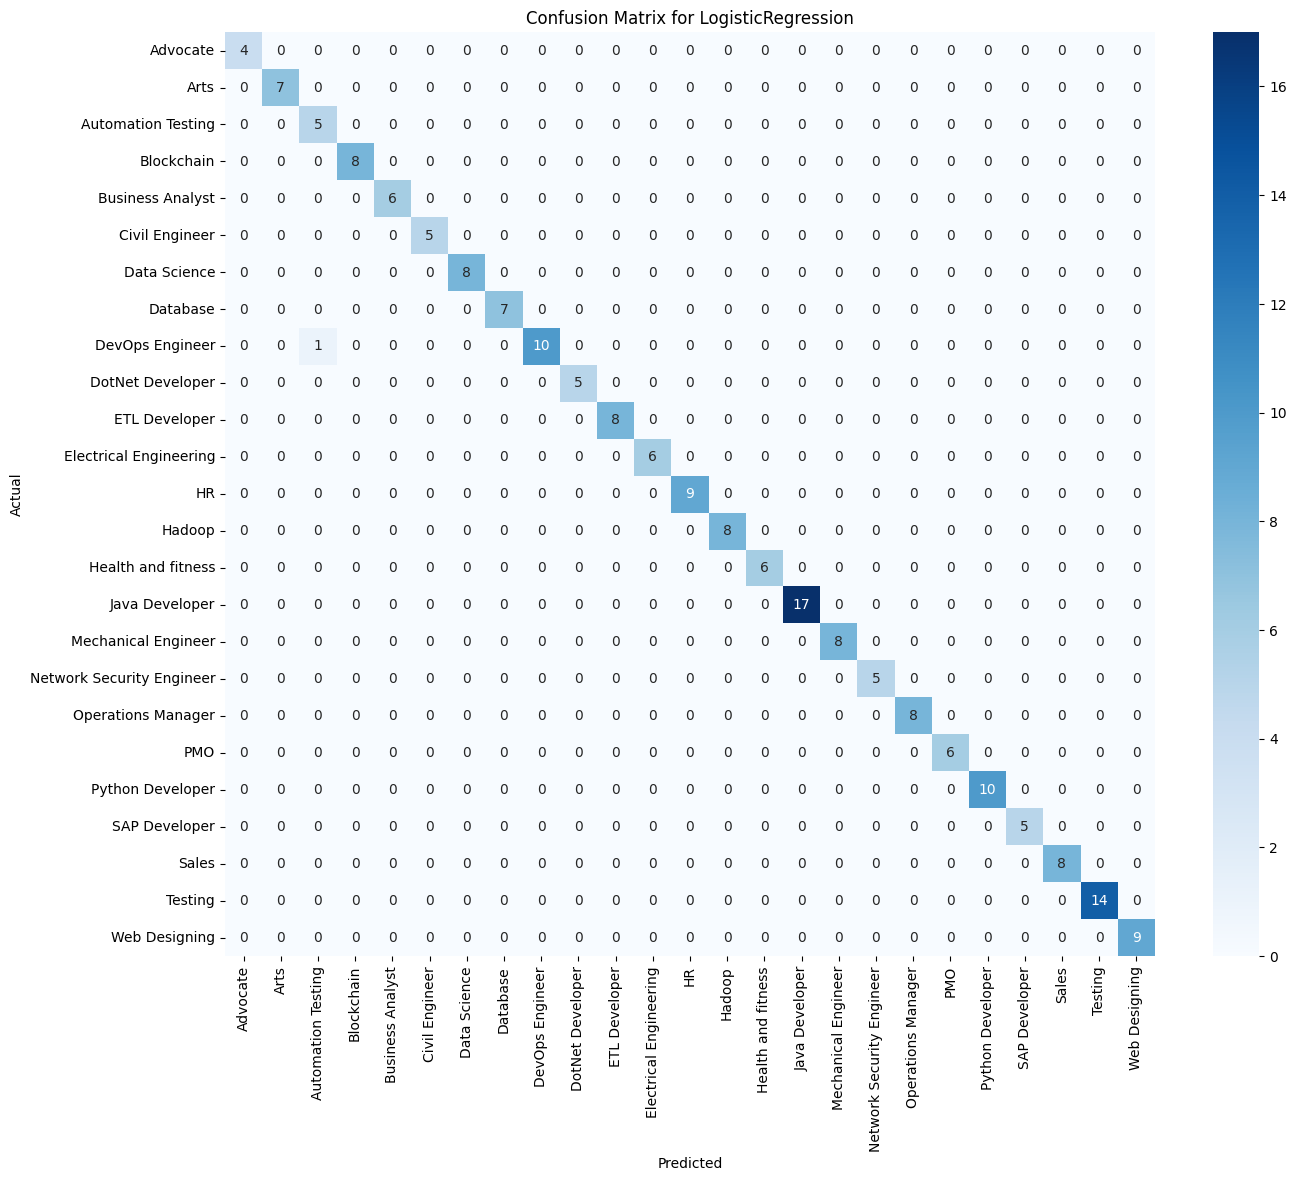

In [12]:
# Load pre-split data for evaluation (from Phase 3 logic)
# Note: For simplicity, we re-run the split logic here. In a large project, you'd save the splits.
df = pd.read_csv('preprocessed_resumes.csv')
label_encoder = joblib.load('label_encoder.joblib')
df['Category_encoded'] = label_encoder.transform(df['Category'])

X = df['cleaned_resume']
y = df['Category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Load the BEST Trained Model
best_model = joblib.load('best_resume_classifier.joblib')
print(f"Evaluating model: {type(best_model).__name__}")

# 3. Prepare Test Data and Make Predictions
# Transform the test data using the loaded vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Make predictions on the test data
y_pred = best_model.predict(X_test_tfidf)

# 4. Perform Detailed Evaluation
# 4.1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# 4.2. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
target_names = label_encoder.inverse_transform(best_model.classes_)
print(classification_report(y_test, y_pred, target_names=target_names))

# 4.3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {type(best_model).__name__}')
plt.show()